In [1]:
# processing USGS oil tank data ID 40851385
# 03252021
# Lat 44°31'43", long 88°00'36" 
# IGLD 1985
# To convert IGLD 1985 to NAVD 1988, add 0.45 ft.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
# read oil tank stage data
# time is from oct 1 to dec 30
oil_tank_stage_loc = r'D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\Oil_tank_gage_oct01_dec30_stage.txt'
# hwy_zz_stage_loc = r'D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\Highway_zz_gage_oct10_dec30_stage.txt'

In [4]:
oil_tank_stage = pd.read_csv(oil_tank_stage_loc, delimiter = '	', header = 27)

In [5]:
oil_tank_stage.columns = ['USGS','Gage_id','Time','Time_zone','Stage(feet)','Others1']

In [6]:
minute_stamp = np.zeros((oil_tank_stage.shape[0], 1))
index = []
for i in range(oil_tank_stage.shape[0]):
    d = datetime.strptime(oil_tank_stage['Time'][i], '%Y-%m-%d %H:%M') # convert string to datetime object
    january1st = datetime(2020, 10, 1) # reference timestamp
    timesince = d - january1st 
    minutessince = int(timesince.total_seconds() / 60) # calculate the minute starting from the reference timestamp
    index.append(d)
    minute_stamp[i] = minutessince
print(np.diff(minute_stamp, axis = 0).max()) # show the interval of the time seires data
print(np.diff(minute_stamp, axis = 0).min()) # show the interval of the time seires data
diff = np.diff(minute_stamp, axis = 0)
# 5.0 is the average interval
# 0 means there are data appeared twice at the same time, which should be removed
[index, value] = np.where(diff == 0) # locate where same time data appears
print(index)
oil_tank_stage['Minute_since'] = minute_stamp

5.0
0.0
[8940 8942 8944 8946 8948 8950 8952 8954 8956 8958 8960 8962]


In [7]:
# show where is the same time data
oil_tank_stage.iloc[index]
# delete these data
oil_tank_stage = oil_tank_stage.drop(index = index)

In [8]:
# change the stage to NAVD 88
oil_tank_stage['Stage(feet)'] = oil_tank_stage['Stage(feet)'] + 0.45

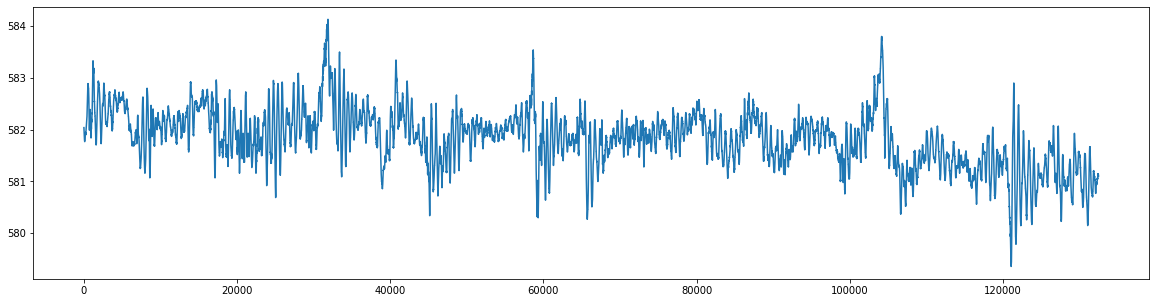

In [9]:
# plot the oiltank stage time series data
ax = plt.figure(figsize = (20, 5))
plt.plot(oil_tank_stage['Minute_since'], oil_tank_stage['Stage(feet)'], label = 'Oil_tank')

In [10]:
# read highway 57 data
hwy_57_stage_loc = r'D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\East_river_gauge_03102021\Clipped_0313_full_length\HWy_57_cliped.csv'
hwy_57_stage = pd.read_csv(hwy_57_stage_loc, header = None)
hwy_57_stage.columns = ['Time','Stage(feet)']

In [11]:
minute_stamp = np.zeros((hwy_57_stage.shape[0], 1))
index = []
for i in range(hwy_57_stage.shape[0]):
    d = datetime.strptime(hwy_57_stage['Time'][i], '%m/%d/%y %I:%M:%S %p') # convert string to datetime object
    january1st = datetime(2020, 10, 1) # reference timestamp
    timesince = d - january1st 
    minutessince = int(timesince.total_seconds() / 60) # calculate the minute starting from the reference timestamp
    index.append(d)
    minute_stamp[i] = minutessince
print(np.diff(minute_stamp, axis = 0).max()) # show the interval of the time seires data
print(np.diff(minute_stamp, axis = 0).min()) # show the interval of the time seires data
diff = np.diff(minute_stamp, axis = 0)
# 5.0 is the average interval
# 0 means there are data appeared twice at the same time, which should be removed
[index, value] = np.where(diff == 0) # locate where same time data appears
print(index)
hwy_57_stage['Minute_since'] = minute_stamp

5.0
5.0
[]


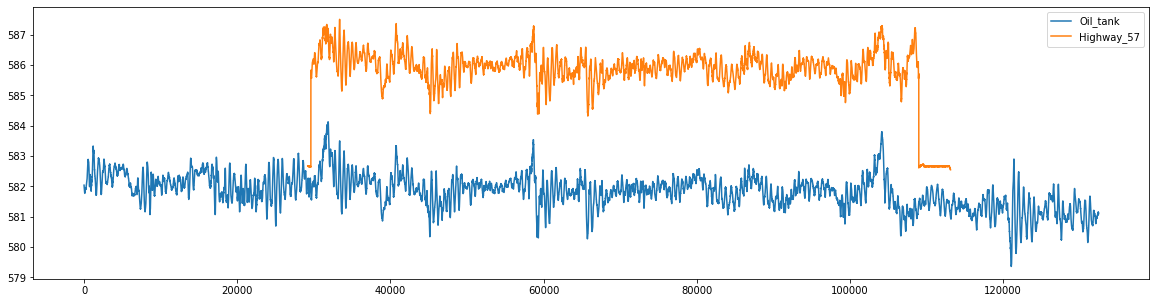

In [12]:
# compare oil tank and hwy 57 stage data
# plot the oiltank stage time series data
ax = plt.figure(figsize = (20, 5))
plt.plot(oil_tank_stage['Minute_since'], oil_tank_stage['Stage(feet)'], label = 'Oil_tank')
plt.plot(hwy_57_stage['Minute_since'], hwy_57_stage['Stage(feet)'], label = 'Highway_57')
plt.legend()

In [13]:
oil_tank_stage

,USGS,Gage_id,Time,Time_zone,Stage(feet),Others1,Minute_since
0,USGS,40851385,2020-10-01 00:00,CDT,582.04,P,0.0
1,USGS,40851385,2020-10-01 00:05,CDT,582.03,P,5.0
2,USGS,40851385,2020-10-01 00:10,CDT,582.00,P,10.0
3,USGS,40851385,2020-10-01 00:15,CDT,581.99,P,15.0
4,USGS,40851385,2020-10-01 00:20,CDT,581.97,P,20.0
...,...,...,...,...,...,...,...
26503,USGS,40851385,2020-12-31 23:35,CST,581.12,P,132455.0
26504,USGS,40851385,2020-12-31 23:40,CST,581.13,P,132460.0
26505,USGS,40851385,2020-12-31 23:45,CST,581.13,P,132465.0
26506,USGS,40851385,2020-12-31 23:50,CST,581.11,P,132470.0


In [22]:
# export oil tank stage data
# export from oct 20 to dec 30
start = oil_tank_stage[oil_tank_stage['Time'] == '2020-10-20 00:00'].index
oil_tank_stage.iloc[start[0]:-1].to_csv(r'D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\oil_tank_stage_oct20_dec30_processed.csv',index = False)